In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random 


In [2]:
df = pd.read_csv('train.csv')
df.head(20)
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
print (len(df.columns))
print (df.columns)

81
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDr

In [4]:
missing_values = df.isnull().sum()
# Pip Install Jinja2 module first
missing_values[missing_values > 0].to_frame().style.background_gradient(cmap='viridis')

,0
LotFrontage,259
Alley,1369
MasVnrType,872
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


In [5]:
# There are a total of 1460 rows and 81 columns
df.shape

(1460, 81)

In [6]:
# Linear Feet of Street connected to the Property (Numerical Variable with 259 missing values) -- NA assumes there is 0 Linear Feet of Street (Fill with 0) 
df['LotFrontage'].value_counts() 


LotFrontage
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: count, Length: 110, dtype: int64

In [7]:
# This returns Gravel / Pavement and has 1306 missing values. Drop this variable
df['Alley'].value_counts()

Alley
Grvl    50
Pave    41
Name: count, dtype: int64

In [8]:
# Masonry Veneer Type -  872 missing values. None means No Type (Fill with NT - None then One Hot Encode]
df['MasVnrType'].value_counts()

MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64


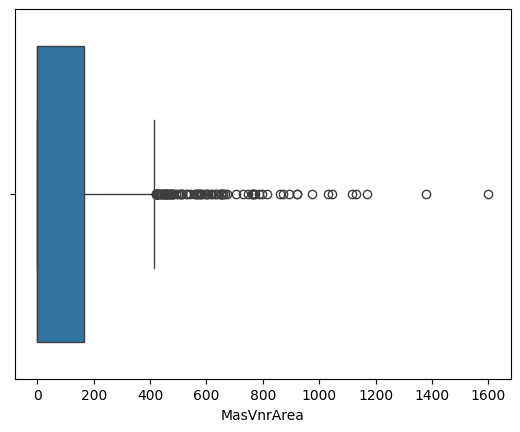

In [9]:
# MasVnrArea refers to Masonry Veneer Area in Square Feet (Has 8 Missing Values. Fill 0)
sns.boxplot(df, x='MasVnrArea')
print (df['MasVnrArea'].describe())

In [10]:
# This refers to Evaluation of Height of the Basement which returns Categorical Variable. -- NA means No Basement (Fill NB -- No Basement and One Hot Encode, 37 Missing Values) 
df['BsmtQual'].value_counts() 

BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64

In [11]:
# Evaluates general condition of basement -- NA means No Basement (Fill NB -- No Basement and One Hot Encode, 37 Missing Values) 
df['BsmtCond'].value_counts() 

BsmtCond
TA    1311
Gd      65
Fa      45
Po       2
Name: count, dtype: int64

In [12]:
# Refers to Walkouts or Garden Level Walls. -- NA means No Basement (Fill NB -- No Basement and One Hot Encode, 38 Missing Values)
df['BsmtExposure'].value_counts() 

BsmtExposure
No    953
Av    221
Gd    134
Mn    114
Name: count, dtype: int64

In [13]:
# Rating of Basement Finished Area. Missing Values are because there are no Basements. (Fill NB -- No Basement and One Hot Encode. 37 Missing Values)
df['BsmtFinType1'].value_counts() 

BsmtFinType1
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: count, dtype: int64

In [14]:
# Rating of Basement Finished Area (If multiple types) -- NA means No Basement. (Fill NB -- No Basement and One Hot Encode, 38 Missing Values)
df['BsmtFinType2'].value_counts() 

BsmtFinType2
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: count, dtype: int64

In [15]:
# Fireplace Quality -- NA means No Fireplace (Fill with NF - No Fireplace and One Hot Encode, 690 missing values)
df['FireplaceQu'].value_counts() 

FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

In [16]:
# Garage Location -- NA means No Garage (Fill with NG - No Garage and One Hot Encode, 81 missing values)
df['GarageType'].value_counts()

GarageType
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64

In [17]:
# Year that Garage was built. -- NA means No Year bc No Garage. Can we just fill with 0? Or delete the rows ? 
df['GarageYrBlt'].value_counts() 

GarageYrBlt
2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: count, Length: 97, dtype: int64

In [18]:
# Interior Finish of the Garage. NA means No Garage. (Fill with NG - No Garage and One Hot Encode, 81 Missing Values)
df['GarageFinish'].value_counts() 

GarageFinish
Unf    605
RFn    422
Fin    352
Name: count, dtype: int64

In [19]:
# Garage Quality -- NA means No Garage (Fill with NG - No Garage and One Hot Encode, 81 missing values)
df['GarageQual'].value_counts() 

GarageQual
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64

In [20]:
# Garage Condition -- NA means No Garage (Fill with NG - No Garage and One Hot Encode, 81 Missing Values)
df['GarageCond'].value_counts() 

GarageCond
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: count, dtype: int64

In [21]:
# Pool Quality -- NA means No Pool (1453 Missing Values, Consider removing if not significant. Otherwise Fill with NP - No Pool, One Hot Encode)
df['PoolQC'].value_counts() 

PoolQC
Gd    3
Ex    2
Fa    2
Name: count, dtype: int64

In [22]:
# Fence Quality -- NA means No Fence (1179 Missing Values, Consider removing if not significant. Otherwise Fill with NF - No Fence, One Hot Encode)
df['Fence'].value_counts() 

Fence
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: count, dtype: int64

In [23]:
# Miscellaneous Features not covered in other categories. (1406 Missing Values) Consider removing if not significant. Otherwise Fill with NF - No Features.
df['MiscFeature'].value_counts() 

MiscFeature
Shed    49
Gar2     2
Othr     2
TenC     1
Name: count, dtype: int64

In [24]:
# df[df['Electrical'] == 'NA']
df['Electrical'].value_counts()

Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

In [25]:
df['Alley'].value_counts()

Alley
Grvl    50
Pave    41
Name: count, dtype: int64

In [26]:
df['SaleType'].value_counts()

SaleType
WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: count, dtype: int64

In [27]:
df['SaleCondition'].value_counts()

SaleCondition
Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: count, dtype: int64

In [28]:
# Fillna fills all missing values for Train dataset df with appropriate values. 
# df['LotFrontage'].fillna(value=0, inplace=True)
# df['Alley'].fillna(value='No Alley', inplace=True)
# df['MasVnrType'].fillna(value='NT', inplace=True)
# df['MasVnrArea'].fillna(value=0, inplace=True)
# df['BsmtQual'].fillna(value='NB', inplace=True)
# df['BsmtCond'].fillna(value='NB', inplace=True)
# df['BsmtExposure'].fillna(value='NB', inplace=True)
# df['BsmtFinType1'].fillna(value='NB', inplace=True)
# df['BsmtFinType2'].fillna(value='NB', inplace=True)
# df['FireplaceQu'].fillna(value='NF', inplace=True)
# df['GarageType'].fillna(value='NG', inplace=True)
# df['GarageYrBlt'].fillna(value='NG', inplace=True)
# df['GarageFinish'].fillna(value='NG', inplace=True)
# df['GarageQual'].fillna(value='NG', inplace=True)
# df['GarageCond'].fillna(value='NG', inplace=True)
# df['PoolQC'].fillna(value='NP', inplace=True)
# df['Fence'].fillna(value='NF', inplace=True)
# df['MiscFeature'].fillna(value='NoFeature', inplace=True)
# df['Electrical'].fillna(value='SBrkr', inplace=True) 

C:\Users\guojiefoo\AppData\Local\Temp\ipykernel_15132\1075943620.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LotFrontage'].fillna(value=0, inplace=True)
C:\Users\guojiefoo\AppData\Local\Temp\ipykernel_15132\1075943620.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



In [29]:
from sklearn.preprocessing import LabelEncoder
def fill_missing_values(train_df): 
    categorical_features = train_df.select_dtypes(include=['object', 'bool'])
    categorical_feature_columns = categorical_features.astype('str').columns
    numerical_features = train_df.select_dtypes(include=['int', 'float']).columns
    
    
    # fill missing values with MODE for categorical features
    for col in categorical_feature_columns:
        # train_df[col].fillna(train_df[col].mode()[0], inplace=True)
        train_df[col].fillna(train_df[col].mode()[0], inplace=True)

        
    # fill missing values with MEDIAN for numerical features
    for col in numerical_features:
        # train_df[col].fillna(train_df[col].median(), inplace=True)
        train_df[col].fillna(train_df[col].median(), inplace=True)
        
    return train_df



train_df = fill_missing_values(df)

le = LabelEncoder()
categorical_data = train_df.select_dtypes(include=['object', 'bool'])
numerical_data = train_df.select_dtypes(include=['int', 'float'])
# apply label encoder on Training categorical feature columns
categorical_data = categorical_data.apply(lambda col: le.fit_transform(col))

trained_filled_data = pd.concat([numerical_data, categorical_data], axis=1)
trained_filled_data


C:\Users\guojiefoo\AppData\Local\Temp\ipykernel_26208\4060156209.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col].fillna(train_df[col].mode()[0], inplace=True)
C:\Users\guojiefoo\AppData\Local\Temp\ipykernel_26208\4060156209.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behave

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,1,1,4,4,2,2,2,2,8,4
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,1,1,4,4,2,2,2,2,8,4
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,1,1,4,4,2,2,2,2,8,4
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,5,2,4,4,2,2,2,2,8,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,1,1,4,4,2,2,2,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,1,1,4,4,2,2,2,2,8,4
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,1,2,4,4,2,2,2,2,8,4
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,1,1,4,4,2,2,0,2,8,4
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,1,2,4,4,2,2,2,2,8,4


In [30]:
missing_values = trained_filled_data.isnull().sum()
# Pip Install Jinja2 module first
missing_values[missing_values > 0].to_frame().style.background_gradient(cmap='viridis')

,0


In [45]:
# numeric_data = df.select_dtypes(include=['int', 'float'])
# categorical_data = df.select_dtypes(include=['object', 'bool'])

# print (numeric_data.shape[1])
# print (categorical_data.shape[1]) 


In [61]:
# from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler
# # from sklearn.compose import ColumnTransformer

# le = LabelEncoder()
# # oe = OrdinalEncoder()
# # # categorical_features = []
# # # for col in categorical_data.columns: 
# # #     if type(col) == 'float': 
# # #         categorical_features.append(col.astype('str'))
        

# # categorical_data = categorical_data.astype('str')

# # # Update the DataFrame to ensure categorical columns are strings
# # df[categorical_data.columns] = categorical_data

# # # numerical_features = numeric_data.astype('int')
# # categorical_features_list = categorical_data.columns.to_list()
# # numerical_features_list = numeric_data.columns.to_list()

# # columns = categorical_features_list + numerical_features_list
# # columns_transformer = ColumnTransformer([
# #     ('encoding', OrdinalEncoder(), categorical_features_list),
# #     ('scaling', StandardScaler(), numerical_features_list)
# # ])

# # encoded_train = columns_transformer.fit_transform(df)

# # apply label encoder on categorical feature columns
# categorical_data = categorical_data.apply(lambda col: le.fit_transform(col))

# # encoded_df = pd.DataFrame(encoded_train, columns=columns)

# # encoded_df.head() 

In [32]:
# filled_data = pd.concat([numeric_data, categorical_data], axis=1)
# print (filled_data.columns)
trained_filled_data['Total Bathrooms'] = trained_filled_data['FullBath'] + 0.5 * trained_filled_data['HalfBath'] + trained_filled_data['BsmtFullBath'] + 0.5 * trained_filled_data['BsmtHalfBath']
trained_filled_data['Total Square Feet'] = trained_filled_data['TotalBsmtSF'] + trained_filled_data['GrLivArea'] + trained_filled_data['GarageArea'] + trained_filled_data['WoodDeckSF'] + trained_filled_data['OpenPorchSF'] + trained_filled_data['EnclosedPorch'] + trained_filled_data['3SsnPorch'] + trained_filled_data['ScreenPorch'] + trained_filled_data['PoolArea']
trained_filled_data['Overall House Age'] = (df['YrSold']) - (df['YearBuilt'])
trained_filled_data['Rebirthed House Age'] = (df['YrSold']) - (df['YearRemodAdd'])
trained_filled_data
# filled_data['Total Bathrooms']

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,Total Bathrooms,Total Square Feet,Overall House Age,Rebirthed House Age
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,2,2,2,2,8,4,3.5,3175,5,5
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,2,2,2,2,8,4,2.5,3282,31,31
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,2,2,2,2,8,4,3.5,3356,7,6
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,2,2,2,2,8,0,2.0,3422,91,36
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,2,2,2,2,8,4,3.5,4455,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,2,2,2,2,8,4,2.5,3100,8,7
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,2,2,2,2,8,4,3.0,4464,32,22
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,2,2,0,2,8,4,2.0,3804,69,4
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,2,2,2,2,8,4,2.0,2874,60,14


In [35]:
# Set Display Options to show all rows and columns 
pd.set_option('display.max_rows', False)
pd.set_option('display.max_columns', False) 

correlation_matrix = trained_filled_data.corr(method='pearson', numeric_only = True)
correlation_matrix

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning,Street,...,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,Total Bathrooms,Total Square Feet,Overall House Age,Rebirthed House Age
Id,1.000000,0.011156,-0.009921,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.051071,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,-0.000122,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917,-0.006096,0.008916,...,0.005847,-0.013735,-0.003815,0.001839,0.021912,0.018111,0.038675,-0.022562,-0.034694,-0.042847,0.036520,0.001689,0.029826,0.008514,0.051070,0.006762,-0.024613,0.014204,0.045159,0.042120,0.002157,0.009821,0.037632,-0.004432,-0.001064,0.004644,0.000195,-0.011390,-0.003230,-0.018025,0.005971,-0.011344,-0.012923,0.005687,0.019773,-0.005806,0.004540,-0.001170,0.012724,0.022049
MSSubClass,0.011156,1.000000,-0.356718,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.081396,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284,0.035900,-0.024969,...,-0.025672,-0.005985,-0.024762,-0.042395,0.746063,0.397161,-0.117817,-0.031336,-0.089159,-0.137229,0.000834,-0.017161,-0.003254,0.058126,-0.041065,-0.013652,-0.064221,0.016599,0.041195,0.048009,0.020760,-0.101774,0.051945,0.010129,0.003711,0.033443,0.090719,0.012301,0.007630,0.002927,-0.059925,-0.001688,0.026310,-0.019705,0.012464,-0.024940,0.151048,-0.088023,-0.028746,-0.041968
LotFrontage,-0.009921,-0.356718,1.000000,0.304522,0.234812,-0.053281,0.116685,0.083348,0.178469,0.214367,0.042463,0.124098,0.363472,0.413773,0.072388,0.037469,0.368007,0.090343,-0.006979,0.180534,0.047222,0.236840,-0.004905,0.320518,0.233221,0.062996,0.269539,0.323511,0.075542,0.137014,0.010287,0.061945,0.037655,0.180819,-0.000255,0.010451,0.006380,0.334771,-0.105961,-0.037349,...,0.065603,0.084901,-0.009341,0.002599,-0.408013,0.030567,0.153999,0.081277,0.075455,0.099515,0.075228,-0.184120,0.048300,0.098418,-0.169603,0.050604,-0.123629,-0.023263,-0.025981,-0.020325,-0.081081,0.067350,0.059572,-0.190232,0.030114,0.056479,-0.216403,-0.211125,0.049935,0.042740,0.088121,-0.153087,-0.035517,0.008363,-0.031412,0.058857,0.200381,0.435070,-0.116223,-0.082957
LotArea,-0.033226,-0.139781,0.304522,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.025865,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843,-0.034452,-0.197131,...,0.436868,0.044569,0.023846,0.022164,-0.205721,-0.033190,0.077054,0.149837,0.004256,-0.003930,-0.002789,-0.057275,0.015160,-0.011081,-0.065150,0.012366,-0.141043,-0.061880,-0.068954,0.028158,0.004212,0.049755,0.043856,-0.057018,-0.022317,0.069154,-0.116799,-0.116326,0.017551,0.028106,0.015134,-0.038048,0.005196,-0.009333,0.012292,0.034169,0.204764,0.311042,-0.014832,-0.014709
OverallQual,-0.028365,0.032628,0.234812,0.105806,1.00

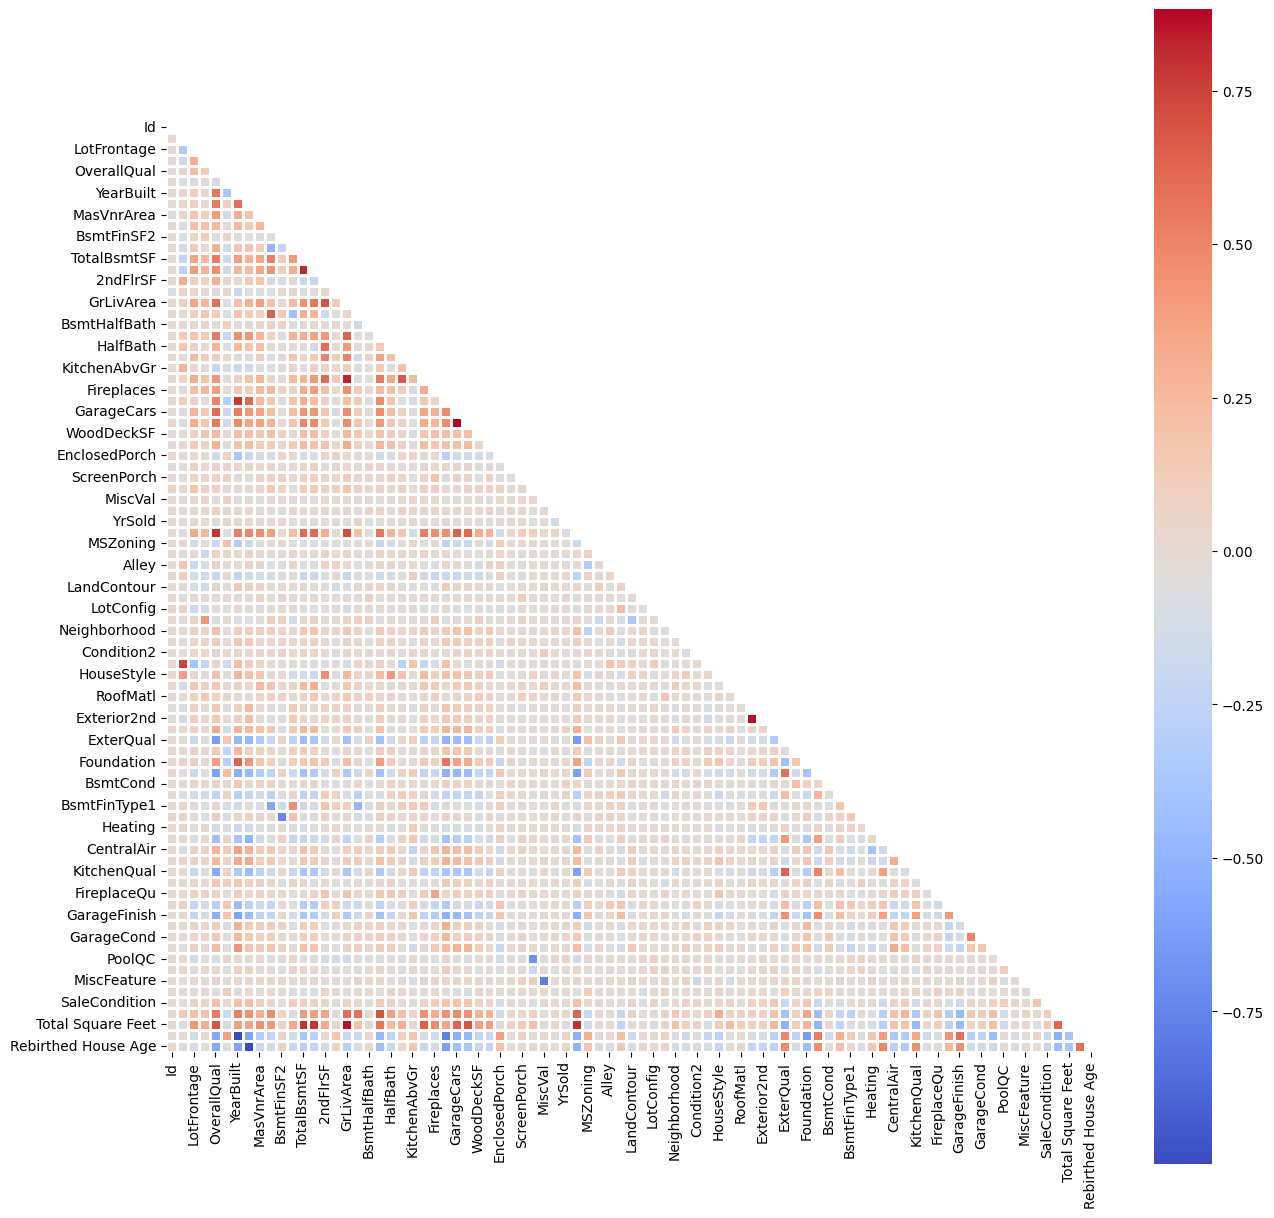

In [36]:
# Create a Mask to filter out top half of correlation matrix
mask = np.zeros_like(correlation_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', square=True, mask=mask, linewidths=1.0)

plt.show() 

In [42]:
#  
# 'Overall House Age',

# Training Data Parameters
y = trained_filled_data['SalePrice']
X = trained_filled_data[[ 'BsmtQual', 'ExterQual','KitchenQual', 
       'OverallQual', 'MasVnrArea', 'GrLivArea',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageFinish', 'GarageCars', 
       'Total Bathrooms', 'Overall House Age','Rebirthed House Age', 'Total Square Feet']]
print (X.shape)
print (y.shape)

(1460, 14)
(1460,)


In [43]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, r2_score
from sklearn.metrics import root_mean_squared_error, root_mean_squared_log_error
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [44]:
# Create a VIF DataFrame 
vif = pd.DataFrame() 
vif['Feature'] = X.columns 
# Calculate VIF Scores for each feature prior to any preprocessing performed
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Overall Quality + Exterior Quality -- Correlation 
# Total Square Feet + 1st Square Feet + GrLivArea -- Correlation 
# Overall House Age / Rebirthed House Age + Year Built + Year RemodAdd -- Perfect Correlation
print (vif)



                Feature  VIF Factor
0              BsmtQual   14.565026
1             ExterQual   28.973757
2           KitchenQual   16.588143
3           OverallQual   33.621165
4            MasVnrArea    1.777360
5             GrLivArea   71.324466
6          TotRmsAbvGrd   53.846772
7            Fireplaces    2.623184
8          GarageFinish    5.812821
9            GarageCars   14.083302
10      Total Bathrooms   18.124529
11    Overall House Age    6.577606
12  Rebirthed House Age    4.190935
13    Total Square Feet   63.385003


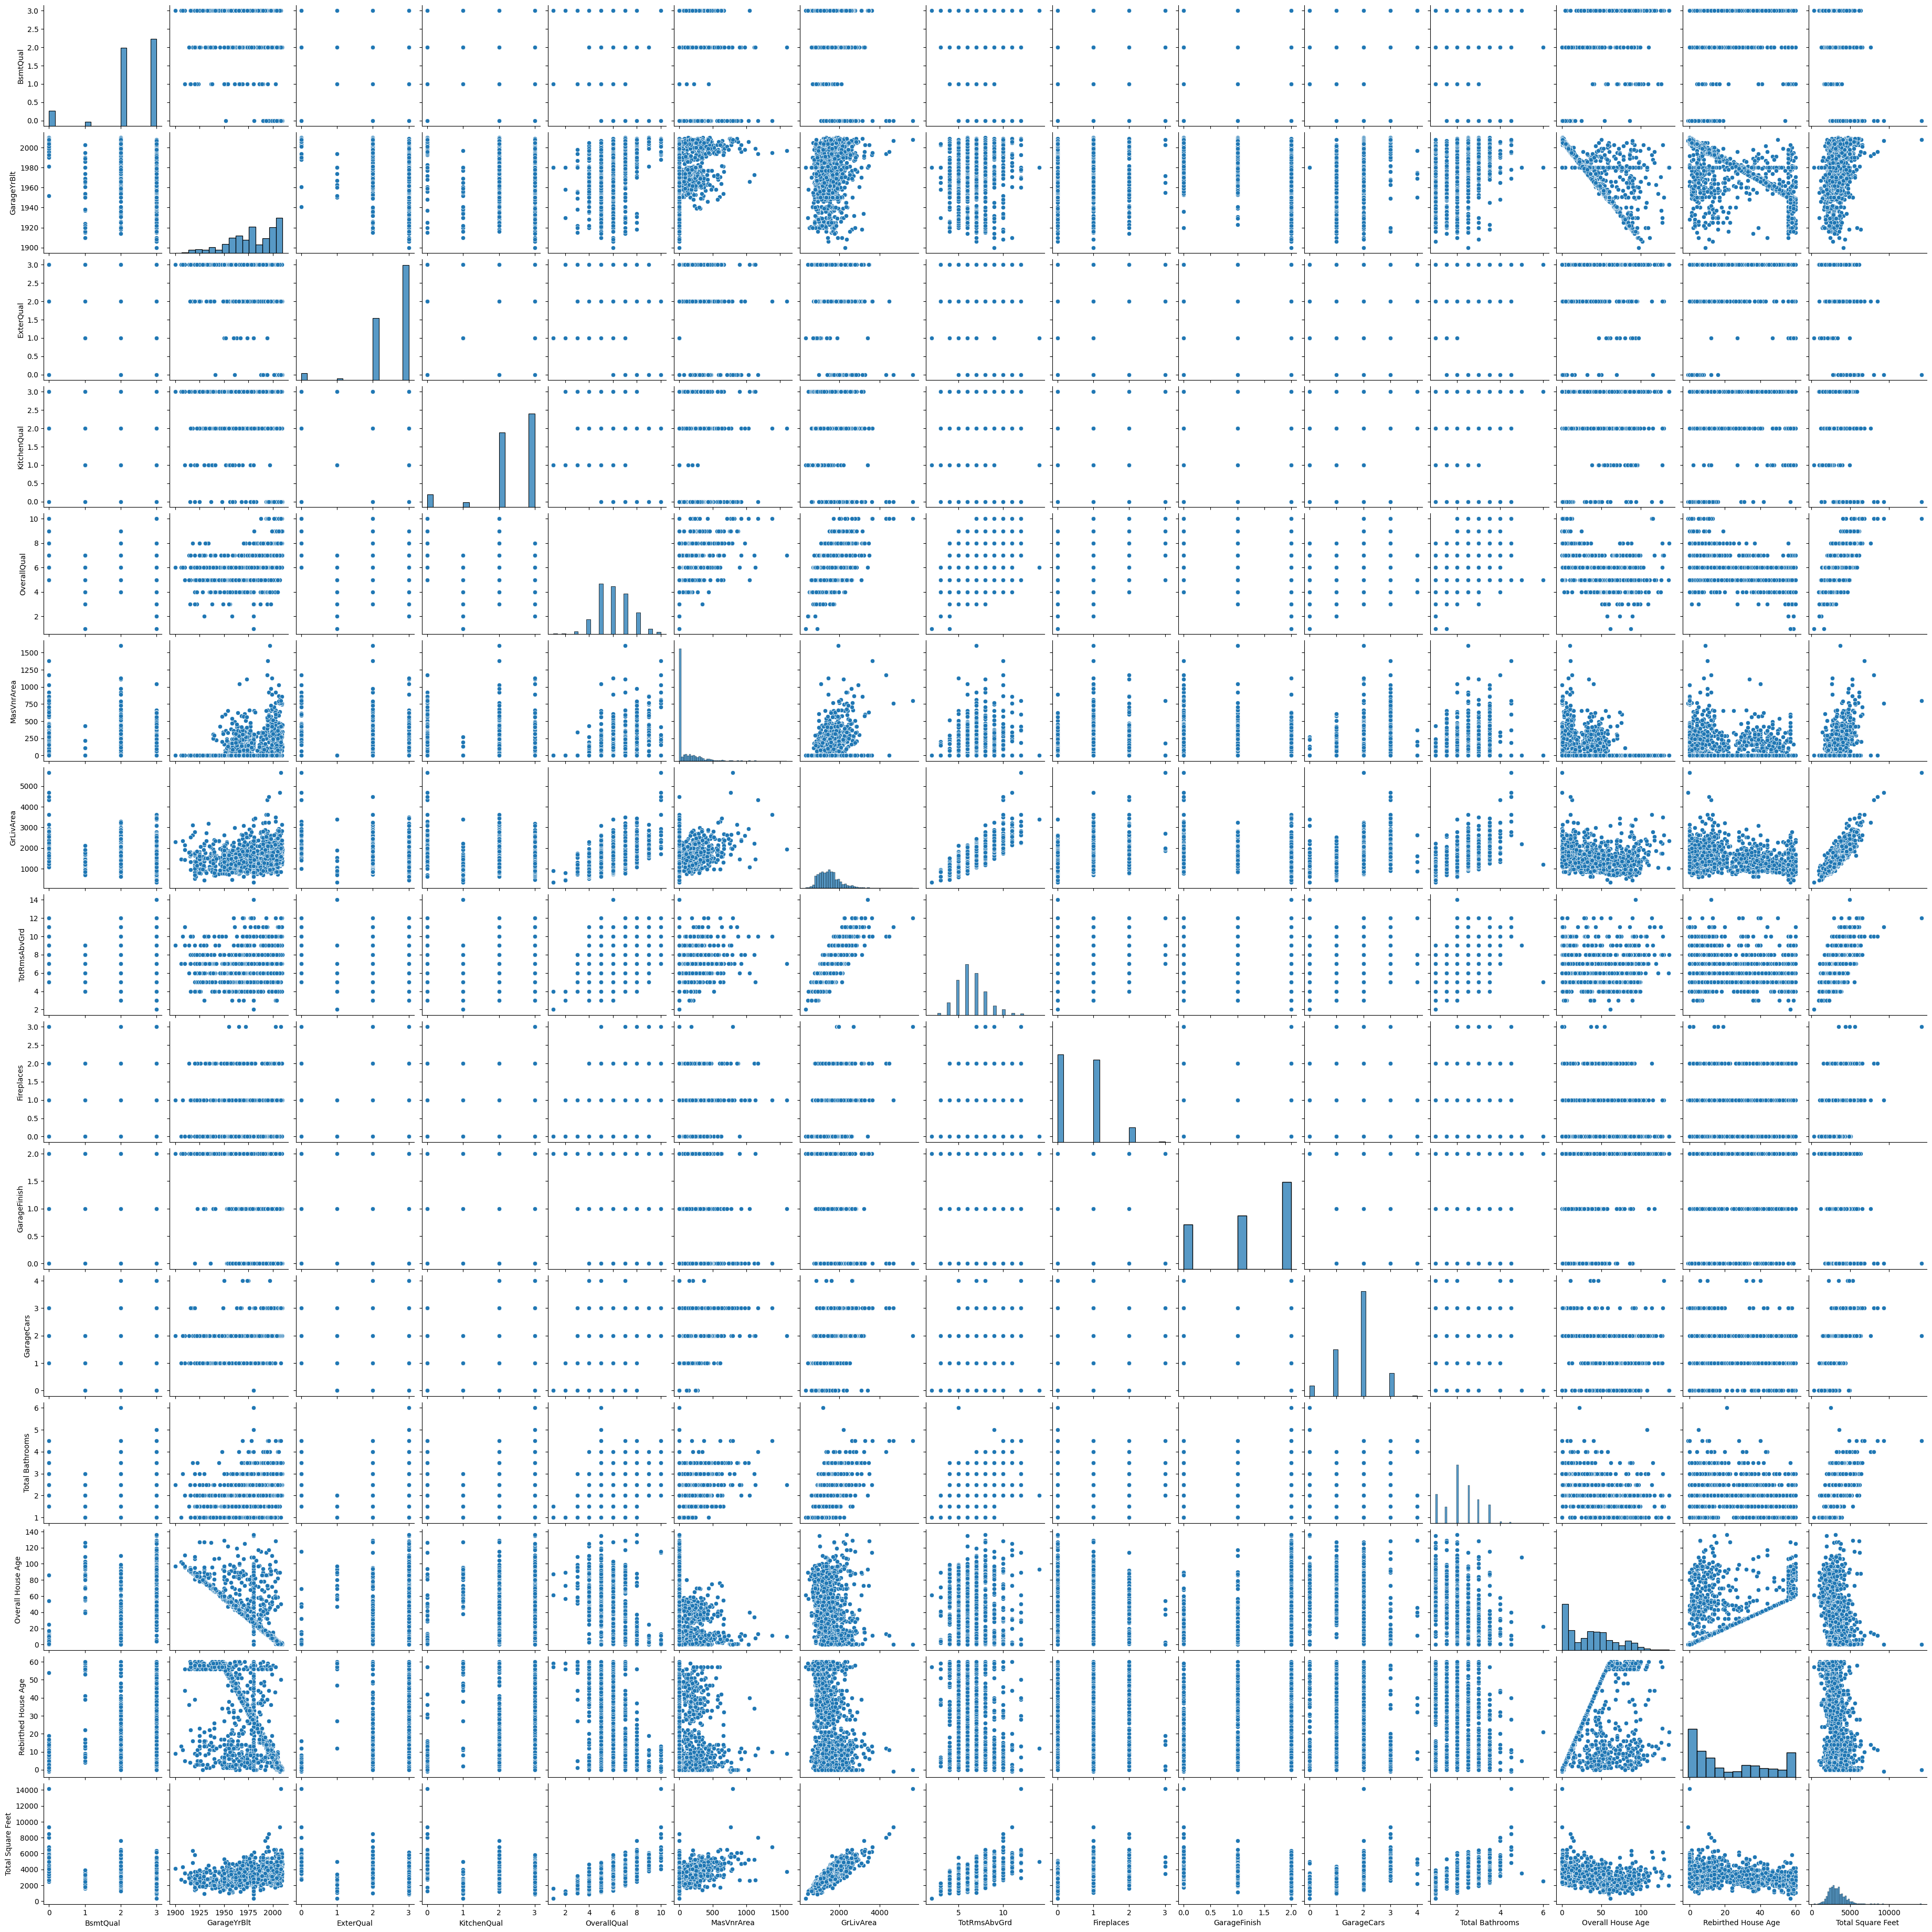

In [40]:
sns.pairplot(X)

In [45]:
import xgboost as xgb 
from sklearn.metrics import mean_squared_error as MSE
import statsmodels.api as sm
from scipy import stats 

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
results = est.fit()
print (results.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     438.8
Date:                Wed, 17 Jul 2024   Prob (F-statistic):               0.00
Time:                        17:25:17   Log-Likelihood:                -17333.
No. Observations:                1460   AIC:                         3.470e+04
Df Residuals:                    1445   BIC:                         3.478e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4.761e+04   1

In [46]:
test_df = pd.read_csv('test.csv')
missing_values = test_df.isnull().sum()
# Pip Install Jinja2 module first
missing_values[missing_values > 0].to_frame().style.background_gradient(cmap='viridis')

,0
MSZoning,4
LotFrontage,227
Alley,1352
Utilities,2
Exterior1st,1
Exterior2nd,1
MasVnrType,894
MasVnrArea,15
BsmtQual,44
BsmtCond,45


In [47]:
def fill_missing_values(test_df): 
    categorical_features = test_df.select_dtypes(include=['object', 'bool'])
    categorical_feature_columns = categorical_features.astype('str').columns
    numerical_features = test_df.select_dtypes(include=['int', 'float']).columns
    
    
    # fill missing values with MODE for categorical features
    for col in categorical_feature_columns:
        # train_df[col].fillna(train_df[col].mode()[0], inplace=True)
        test_df[col].fillna(test_df[col].mode()[0], inplace=True)

        
    # fill missing values with MEDIAN for numerical features
    for col in numerical_features:
        # train_df[col].fillna(train_df[col].median(), inplace=True)
        test_df[col].fillna(test_df[col].median(), inplace=True)
        
    return test_df

X_test = test_df.drop('Id', axis=1)

X_test = fill_missing_values(X_test)

le = LabelEncoder()
categorical_data = X_test.select_dtypes(include=['object', 'bool'])
numerical_data = X_test.select_dtypes(include=['int', 'float'])
# apply label encoder on Testing categorical feature columns
categorical_data = categorical_data.apply(lambda col: le.fit_transform(col))

test_filled_data = pd.concat([numerical_data, categorical_data], axis=1)
test_filled_data


C:\Users\guojiefoo\AppData\Local\Temp\ipykernel_26208\3490875056.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df[col].fillna(test_df[col].mode()[0], inplace=True)
C:\Users\guojiefoo\AppData\Local\Temp\ipykernel_26208\3490875056.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,6,2010,2,1,0,3,3,0,4,0,12,1,2,0,2,1,0,10,12,1,3,4,1,3,3,3,4,3,0,4,1,3,3,6,2,1,2,3,4,2,0,2,2,8,4
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,0,12500,6,2010,3,1,0,0,3,0,0,0,12,2,2,0,2,3,0,11,13,1,3,4,1,3,3,3,0,5,0,4,1,3,2,6,2,1,2,3,4,2,0,2,0,8,4
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,1997.0,2.0,482.0,212,34,0,0,0,0,0,3,2010,3,1,0,0,3,0,4,0,8,2,2,0,4,1,0,10,12,1,3,4,2,2,3,3,2,5,0,2,1,3,3,6,4,1,0,3,4,2,0,2,2,8,4
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,324.0,926.0,926,678,0,1604,0.0,0.0,2,1,3,1,7,1,1998.0,2.0,470.0,360,36,0,0,0,0,0,6,2010,3,1,0,0,3,0,4,0,8,2,2,0,4,1,0,10,12,1,3,4,2,3,3,3,2,5,0,0,1,3,2,6,2,1,0,3,4,2,0,2,2,8,4
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,1017.0,1280.0,1280,0,0,1280,0.0,0.0,2,0,2,1,5,0,1992.0,2.0,506.0,0,82,0,0,144,0,0,1,2010,3,1,0,0,1,0,4,0,22,2,2,4,2,1,0,6,6,1,2,4,2,2,3,3,0,5,0,0,1,3,2,6,2,1,1,3,4,2,0,2,2,8,4
5,60,75.0,10000,6,5,1993,1994,0.0,0.0,0.0,763.0,763.0,763,892,0,1655,0.0,0.0,2,1,3,1,7,1,1993.0,2.0,440.0,157,84,0,0,0,0,0,4,2010,3,1,0,0,3,0,0,0,8,2,2,0,4,1,0,6,6,1,3,4,2,2,3,3,5,5,0,2,1,3,3,6,4,1,0,3,4,2,0,2,2,8,4
6,20,67.0,7980,6,7,1992,2007,0.0,935.0,0.0,233.0,1168.0,1187,0,0,1187,1.0,0.0,2,0,3,1,6,0,1992.0,2.0,420.0,483,21,0,0,0,0,500,3,2010,3,1,0,0,3,0,4,0,8,2,2,0,2,1,0,6,6,1,3,2,2,2,3,3,0,5,0,0,1,3,3,6,2,1,0,3,4,2,0,0,2,8,4
7,60,63.0,8402,6,5,1998,1998,0.0,0.0,0.0,789.0,789.0,789,676,0,1465,0.0,0.0,2,1,3,1,7,1,1998.0,2.0,393.0,0,75,0,0,0,0,0,5,2010,3,1,0,0,3,0,4,0,8,2,2,0,4,1,0,10,12,1,3,4,2,2,3,3,5,5,0,2,1,3,3,6,2,1,0,3,4,2,0,2,2,8,4
8,20,85.0,10176,7,5,1990,1990,0.0,637.0,0.0,663.0,1300.0,1341,0,0,1341,1.0,0.0,1,1,2,1,5,1,1990.0,2.0,506.0,192,0,0,0,0,0,0,2,2010,3,1,0,3,3,0,4,0,8,2,2,0,2,1,0,6,6,1,3,4,2,2,3,1,2,5,0,2,1,3,2,6,3,1,2,3,4,2,0,2,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [48]:
missing_values = X_test.isnull().sum()
# Pip Install Jinja2 module first
missing_values[missing_values > 0].to_frame().style.background_gradient(cmap='viridis')


,0


In [49]:
test_filled_data['Total Bathrooms'] = test_filled_data['FullBath'] + 0.5 * test_filled_data['HalfBath'] + test_filled_data['BsmtFullBath'] + 0.5 * test_filled_data['BsmtHalfBath']
test_filled_data['Total Square Feet'] = test_filled_data['TotalBsmtSF'] + test_filled_data['GrLivArea'] + test_filled_data['GarageArea'] + test_filled_data['WoodDeckSF'] + test_filled_data['OpenPorchSF'] + test_filled_data['EnclosedPorch'] + test_filled_data['3SsnPorch'] + test_filled_data['ScreenPorch'] + test_filled_data['PoolArea']
test_filled_data['Overall House Age'] = (test_df['YrSold']) - (test_df['YearBuilt'])
test_filled_data['Rebirthed House Age'] = (test_df['YrSold']) - (test_df['YearRemodAdd'])
test_filled_data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning,Street,Alley,LotShape,...,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,Total Bathrooms,Total Square Feet,Overall House Age,Rebirthed House Age
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,6,2010,2,1,0,3,...,0,12,1,2,0,2,1,0,10,12,1,3,4,1,3,3,3,4,3,0,4,1,3,3,6,2,1,2,3,4,2,0,2,2,8,4,1.0,2768.0,49,49
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,0,12500,6,2010,3,1,0,0,...,0,12,2,2,0,2,3,0,11,13,1,3,4,1,3,3,3,0,5,0,4,1,3,2,6,2,1,2,3,4,2,0,2,0,8,4,1.5,3399.0,52,52
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,1997.0,2.0,482.0,212,34,0,0,0,0,0,3,2010,3,1,0,0,...,0,8,2,2,0,4,1,0,10,12,1,3,4,2,2,3,3,2,5,0,2,1,3,3,6,4,1,0,3,4,2,0,2,2,8,4,2.5,3285.0,13,12
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,324.0,926.0,926,678,0,1604,0.0,0.0,2,1,3,1,7,1,1998.0,2.0,470.0,360,36,0,0,0,0,0,6,2010,3,1,0,0,...,0,8,2,2,0,4,1,0,10,12,1,3,4,2,3,3,3,2,5,0,0,1,3,2,6,2,1,0,3,4,2,0,2,2,8,4,2.5,3396.0,12,12
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,1017.0,1280.0,1280,0,0,1280,0.0,0.0,2,0,2,1,5,0,1992.0,2.0,506.0,0,82,0,0,144,0,0,1,2010,3,1,0,0,...,0,22,2,2,4,2,1,0,6,6,1,2,4,2,2,3,3,0,5,0,0,1,3,2,6,2,1,1,3,4,2,0,2,2,8,4,2.0,3292.0,18,18
5,60,75.0,10000,6,5,1993,1994,0.0,0.0,0.0,763.0,763.0,763,892,0,1655,0.0,0.0,2,1,3,1,7,1,1993.0,2.0,440.0,157,84,0,0,0,0,0,4,2010,3,1,0,0,...,0,8,2,2,0,4,1,0,6,6,1,3,4,2,2,3,3,5,5,0,2,1,3,3,6,4,1,0,3,4,2,0,2,2,8,4,2.5,3099.0,17,16
6,20,67.0,7980,6,7,1992,2007,0.0,935.0,0.0,233.0,1168.0,1187,0,0,1187,1.0,0.0,2,0,3,1,6,0,1992.0,2.0,420.0,483,21,0,0,0,0,500,3,2010,3,1,0,0,...,0,8,2,2,0,2,1,0,6,6,1,3,2,2,2,3,3,0,5,0,0,1,3,3,6,2,1,0,3,4,2,0,0,2,8,4,3.0,3279.0,18,3
7,60,63.0,8402,6,5,1998,1998,0.0,0.0,0.0,789.0,789.0,789,676,0,1465,0.0,0.0,2,1,3,1,7,1,1998.0,2.0,393.0,0,75,0,0,0,0,0,5,2010,3,1,0,0,...,0,8,2,2,0,4,1,0,10,12,1,3,4,2,2,3,3,5,5,0,2,1,3,3,6,2,1,0,3,4,2,0,2,2,8,4,2.5,2722.0,12,12
8,20,85.0,10176,7,5,1990,1990,0.0,637.0,0.0,663.0,1300.0,1341,0,0,1341,1.0,0.0,1,1,2,1,5,1,1990.0,2.0,506.0,192,0,0,0,0,0,0,2,2010,3,1,0,3,...,0,8,2,2,0,2,1,0,6,6,1,3,4,2,2,3,1,2,5,0,2,1,3,2,6,3,1,2,3,4,2,0,2,2,8,4,2.5,3339.0,20,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [50]:
# Testing Data Parameters
X_test = test_filled_data[[ 'BsmtQual','ExterQual','KitchenQual',
       'OverallQual', 'MasVnrArea', 'GrLivArea',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageFinish', 'GarageCars', 
       'Total Bathrooms', 'Overall House Age', 'Rebirthed House Age', 'Total Square Feet']]

X_test

,BsmtQual,ExterQual,KitchenQual,OverallQual,MasVnrArea,GrLivArea,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageCars,Total Bathrooms,Overall House Age,Rebirthed House Age,Total Square Feet
0,3,3,3,5,0.0,896,5,0,2,1.0,1.0,49,49,2768.0
1,3,3,2,6,108.0,1329,6,0,2,1.0,1.5,52,52,3399.0
2,2,3,3,5,0.0,1629,6,1,0,2.0,2.5,13,12,3285.0
3,3,3,2,6,20.0,1604,7,1,0,2.0,2.5,12,12,3396.0
4,2,2,2,8,0.0,1280,5,0,1,2.0,2.0,18,18,3292.0
5,2,3,3,6,0.0,1655,7,1,0,2.0,2.5,17,16,3099.0
6,2,3,3,6,0.0,1187,6,0,0,2.0,3.0,18,3,3279.0
7,2,3,3,6,0.0,1465,7,1,0,2.0,2.5,12,12,2722.0
8,2,3,2,7,0.0,1341,5,1,2,2.0,2.5,20,20,3339.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [51]:
from xgboost import XGBRegressor
from sklearn.model_selection import StratifiedKFold

In [53]:

# Define the Parameter Grid
param_grid = {
    'max_depth': [4, 5, 6],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 1.5, 2]
}

# # Split the Training Dataset into Training and Testing Sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42) 

# Initialise XGBRegressor 
xgb_regressor = XGBRegressor(objective='reg:linear', learning_rate=0.1, colsample_bytree=0.8, gamma=0, n_estimators=100)

# Initialise CV
cv = StratifiedKFold(n_splits=5, shuffle=True)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, 
                           scoring='neg_root_mean_squared_error', cv=cv, verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

cv_result = pd.DataFrame.from_dict(grid_search.cv_results_).sort_values(by='mean_test_score', ascending=False)
cv_result.head()

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


c:\Users\guojiefoo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\guojiefoo\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:26:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_child_weight,param_reg_alpha,param_reg_lambda,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8,0.072727,0.004658,0.009452,0.002704,4,1,0.00,2.0,1.0,"{'max_depth': 4, 'min_child_weight': 1, 'reg_a...",-25147.584198,-29590.044126,-33137.373037,-24869.722372,-24661.366978,-27481.218142,3366.201222,1
17,0.072916,0.002535,0.009570,0.001594,4,1,0.01,2.0,1.0,"{'max_depth': 4, 'min_child_weight': 1, 'reg_a...",-25147.584147,-29590.044685,-33137.371838,-24869.723686,-24661.367036,-27481.218278,3366.200683,2
26,0.075923,0.006464,0.008962,0.000212,4,1,0.10,2.0,1.0,"{'max_depth': 4, 'min_child_weight': 1, 'reg_a...",-25147.583979,-29590.044176,-33137.369826,-25029.982244,-24661.364245,-27513.268894,3341.857110,3
14,0.086356,0.010289,0.009769,0.001569,4,1,0.01,1.5,1.0,"{'max_depth': 4, 'min_child_weight': 1, 'reg_a...",-24398.751619,-30283.003407,-33983.025327,-25405.296482,-25213.658483,-27856.747063,3697.871412,4
5,0.064526,0.003234,0.008232,0.001036,4,1,0.00,1.5,1.0,"{'max_depth': 4, 'min_child_weight': 1, 'reg_a...",-24398.751561,-30283.002332,-33983.025366,-25405.296576,-25213.659571,-27856.747081,3697.871127,5


In [54]:
best_estimator = grid_search.best_estimator_

print(f"""
Avg_r2_score: {grid_search.best_score_}
parameters: {grid_search.best_params_}
""")

best_estimator


Avg_r2_score: -27481.21814215779
parameters: {'max_depth': 4, 'min_child_weight': 1, 'reg_alpha': 0, 'reg_lambda': 2, 'subsample': 1.0}



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [55]:
# # Split the Training Dataset into Training and Testing Sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=1) 
# # # Initialise XGBRegressor 
# xgb_regressor = XGBRegressor(objective='reg:linear', n_estimators=200, colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, reg_alpha=0.01, reg_lambda=2, subsample=0.8)
# # Fit the XGBRegressor model
# xgb_regressor.fit(X_train, y_train)


best_estimator.fit(X_train, y_train)

c:\Users\guojiefoo\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:26:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [56]:
# Finding Predicted y_pred values from X_val
y_pred  = best_estimator.predict(X_val)

# Instantiating Logarithmic Values for y_pred and y_test
log_y_pred_values = np.log(y_pred)
log_y_val_values = np.log(y_val)

# Calculate RMSE for TRAINING DATASET splitting into training and testing respectively. 
rmse = np.sqrt(MSE(log_y_pred_values, log_y_val_values))
rmse

0.14430195743865734

In [57]:
submission = pd.read_csv('test.csv', usecols=['Id'])
submission['SalePrice'] = best_estimator.predict(X_test)
submission.to_csv('HousePriceRegression_submission.csv', index=False)